# ENEXIS Graduation Project

####  EDA of PV installed capacity

### Contents

* [Reading of PV installed capacity & demographics dataset](#readpv)

#### EDA of PV installed capacity as a function of demographic features
  
   * [1. Level of urbanization ("Mate van stedelijkheid")](#total)
   * [2. Percentage of privately owned houses](#koop)
   * [3. Percentage of one family houses](#een)
   * [4. Housholds with PV per 100 households in 2022](#pv2022)
   * [5. Province](#prov)
   * [6. Average electricity consumption](#elec)

In [10]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import cbsodata
pd.options.mode.chained_assignment = None  # default='warn'

<a id='readpv'></a>
#### Reading of PV installed capacity & demographics dataset

In [11]:
c_path = "../Data/"
v_file = "PV installed capacity & demographics"

In [12]:
df     = pd.read_csv(filepath_or_buffer = c_path + v_file + ".csv",
                      encoding           = 'UTF-8')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18686 entries, 0 to 18685
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       18686 non-null  object 
 1   BU_2021                                    18686 non-null  object 
 2   BU_NAAM                                    18686 non-null  object 
 3   WK_2021                                    18686 non-null  object 
 4   WK_NAAM                                    18686 non-null  object 
 5   GM_2021                                    18686 non-null  object 
 6   GM_NAAM                                    18686 non-null  object 
 7   ProvinciecodePV                            18686 non-null  object 
 8   Provincienaam                              18686 non-null  object 
 9   Aantal aansluitingen met opwekinstallatie  18686 non-null  float64
 10  Opgesteld vermogen    

In [14]:
df.shape

(18686, 33)

In [15]:
df.head()

,Year,BU_2021,BU_NAAM,WK_2021,WK_NAAM,GM_2021,GM_NAAM,ProvinciecodePV,Provincienaam,Aantal aansluitingen met opwekinstallatie,...,GemiddeldElektriciteitsverbruikTotaal_47,GemiddeldAardgasverbruikTotaal_55,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens
0,2019-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,396.0,...,2930.0,1590.0,2.098425,0.811594,0.174497,1.3,0.8,5.0,95.704698,26.577181
1,2018-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,308.0,...,2930.0,1590.0,2.098425,0.811594,0.174497,1.3,0.8,5.0,71.677852,20.671141
2,2017-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,191.0,...,2930.0,1590.0,2.098425,0.811594,0.174497,1.3,0.8,5.0,48.724832,12.818792
3,2016-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,128.0,...,2930.0,1590.0,2.098425,0.811594,0.174497,1.3,0.8,5.0,33.825503,8.590604
4,2020-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,392.0,...,2930.0,1590.0,2.098425,0.811594,0.174497,1.3,0.8,5.0,108.120805,26.308725


### EDA of PV installed capacity as a function of demographic features

In [16]:
df = df.drop(df[df['Year'].isin(['2021-07-01', '2020-07-01'])].index)

In [17]:
table_PV1 = df.groupby('Year').mean()
table_PV1 = table_PV1.reset_index()

In [18]:
table_PV1.T

,0,1,2,3,4,5,6
Year,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01,2021-01-01,2022-01-01
Aantal aansluitingen met opwekinstallatie,41.858696,56.086957,71.862949,103.418242,114.299544,143.460789,182.414878
Opgesteld vermogen,142.833648,192.234405,251.060491,373.325142,478.784085,609.724793,816.52599
OV_per_installatie,3.608686,3.819656,3.945255,4.120406,5.208647,5.324804,5.893978
MeestVoorkomendePostcode_113,6798.068526,6798.068526,6798.068526,6798.068526,6766.901673,6775.962494,6796.028612
HuishoudensTotaal_28,739.298204,739.298204,739.298204,739.298204,782.531678,758.543595,745.698617
GemiddeldeHuishoudensgrootte_32,2.319376,2.319376,2.319376,2.319376,2.309022,2.314077,2.318026
Bevolkingsdichtheid_33,2339.57656,2339.57656,2339.57656,2339.57656,2453.607197,2393.88602,2359.885551
Woningvoorraad_34,736.204631,736.204631,736.204631,736.204631,778.997466,755.345348,742.528374
GemiddeldeWoningwaarde_35,256.47463,256.47463,256.47463,256.47463,254.896685,255.575725,256.528042


<AxesSubplot:xlabel='Year', ylabel='PVinstallaties_per100houshoudens'>

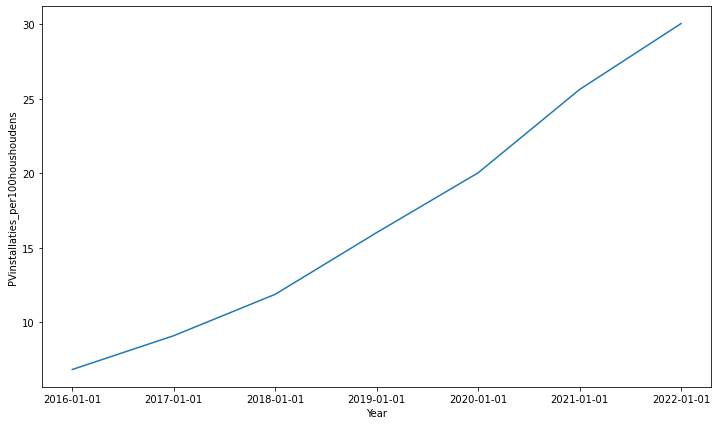

In [19]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV1, x = 'Year', y = 'PVinstallaties_per100houshoudens')

<AxesSubplot:xlabel='Year', ylabel='Opgesteld_vermogen_per100houshoudens'>

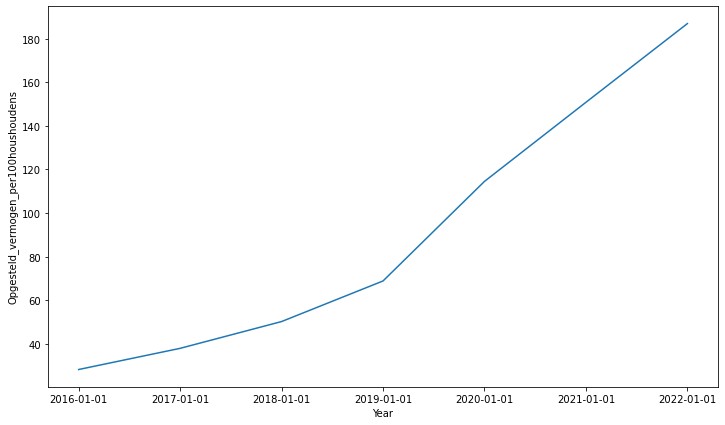

In [20]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV1, x = 'Year', y = 'Opgesteld_vermogen_per100houshoudens')

<a id='total'></a>
#### 1. Level of urbanization ("Mate van stedelijkheid")

In [21]:
table_PV2 = df.groupby(['Year', 'MateVanStedelijkheid_115']).mean()
table_PV2 = table_PV2.reset_index()

In [22]:
table_PV2.head()

,Year,MateVanStedelijkheid_115,Aantal aansluitingen met opwekinstallatie,Opgesteld vermogen,OV_per_installatie,MeestVoorkomendePostcode_113,HuishoudensTotaal_28,GemiddeldeHuishoudensgrootte_32,Bevolkingsdichtheid_33,Woningvoorraad_34,...,BouwjaarVanaf2000_46,GemiddeldElektriciteitsverbruikTotaal_47,GemiddeldAardgasverbruikTotaal_55,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens
0,2016-01-01,1.0,36.355372,86.619835,2.606984,7242.280992,1718.223140,1.722314,7192.520661,1509.644628,...,13.553719,2304.380165,1102.314050,2.108092,0.814656,0.157457,0.652066,0.542149,5.655905,2.331855
1,2016-01-01,2.0,51.377907,153.325581,3.109359,6432.485465,1168.924419,2.075872,4460.965116,1178.430233,...,10.962209,2700.581395,1217.543860,1.930874,0.812315,0.151605,1.000880,0.600291,15.282601,5.065358
2,2016-01-01,3.0,68.492492,221.126126,3.016349,6586.516517,1136.456456,2.259760,3645.558559,1151.153153,...,11.132132,2984.414414,1333.231707,1.981126,0.806943,0.191130,1.156839,0.641141,20.848417,6.329271
3,2016-01-01,4.0,66.882883,229.633634,3.440829,6747.288288,911.381381,2.363363,2266.228228,931.171171,...,17.066066,3305.975976,1556.066066,1.997266,0.812791,0.361411,1.291054,0.797598,28.992956,7.821499
4,2016-01-01,5.0,21.746193,90.261929,4.163121,6959.862944,276.558376,2.483046,585.839594,280.556345,...,11.896341,3913.729675,1938.196721,1.992399,0.838749,0.414915,1.506831,1.605392,37.809673,7.845678


<AxesSubplot:xlabel='Year', ylabel='Opgesteld vermogen'>

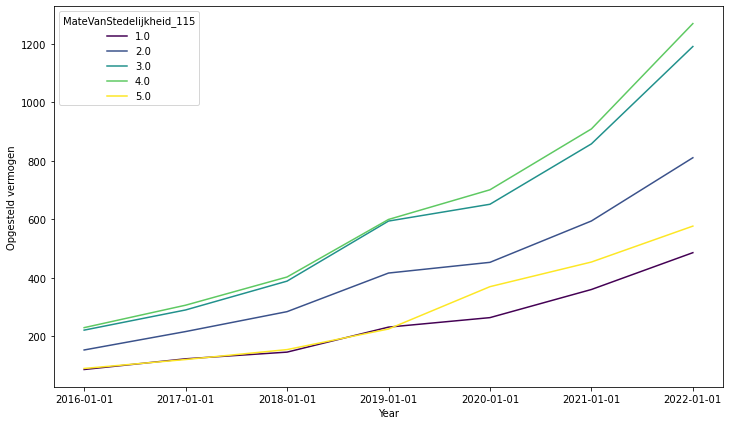

In [23]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV2, x = 'Year', y = 'Opgesteld vermogen', hue = 'MateVanStedelijkheid_115', palette = "viridis")

<AxesSubplot:xlabel='Year', ylabel='OV_per_installatie'>

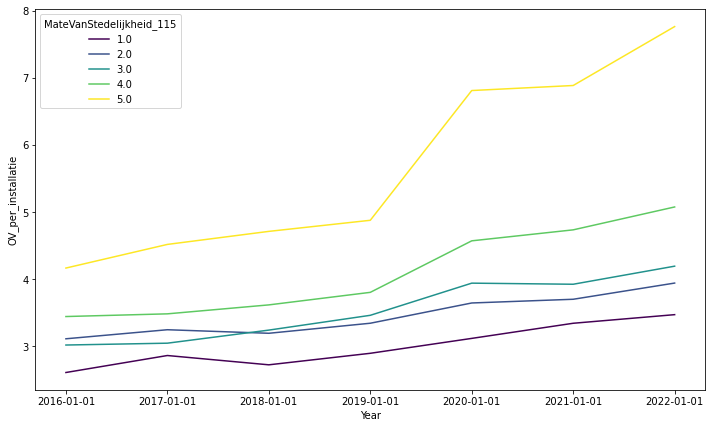

In [24]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV2, x = 'Year', y = 'OV_per_installatie', hue = 'MateVanStedelijkheid_115', palette = "viridis")

<AxesSubplot:xlabel='Year', ylabel='Opgesteld_vermogen_per100houshoudens'>

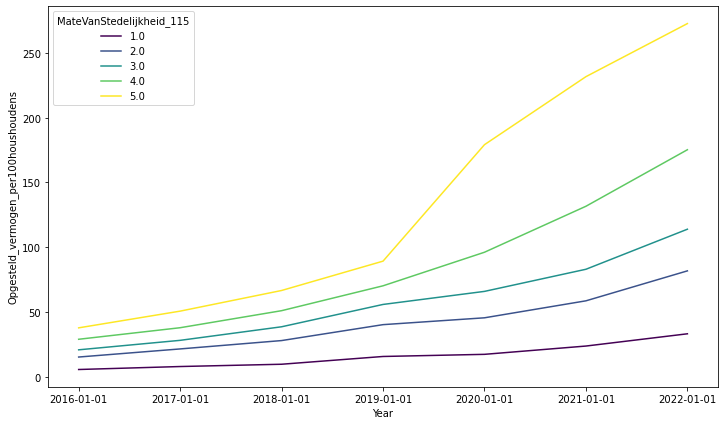

In [25]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV2, x = 'Year', y = 'Opgesteld_vermogen_per100houshoudens', hue = 'MateVanStedelijkheid_115', 
             palette = "viridis")

<AxesSubplot:xlabel='Year', ylabel='PVinstallaties_per100houshoudens'>

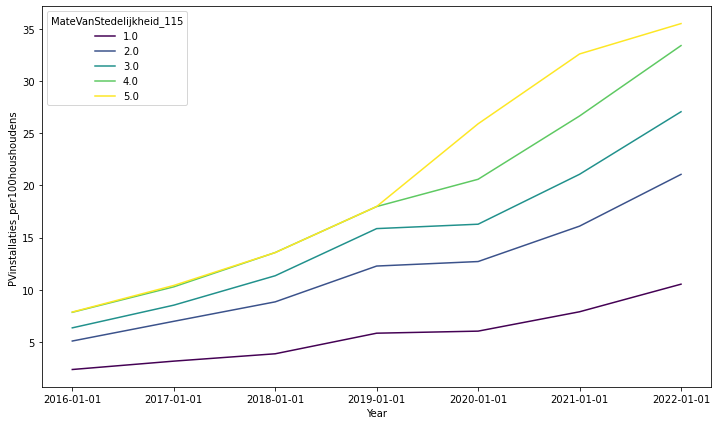

In [26]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV2, x = 'Year', y = 'PVinstallaties_per100houshoudens', hue = 'MateVanStedelijkheid_115', 
             palette = "viridis")

<a id='koop'></a>
#### 2. Percentage of privately owned houses

In [27]:
bins = [0, 20, 40, 60, 80, np.inf]
names = ['<20', '21-40', '41-60', '61-80', '81-100']

df['%_Koopwoningen'] = pd.cut(df['Koopwoningen_40'], bins, labels=names)

In [28]:
table_PV3 = df.groupby(['Year', '%_Koopwoningen']).mean()
table_PV3 = table_PV3.reset_index()

<AxesSubplot:xlabel='Year', ylabel='PVinstallaties_per100houshoudens'>

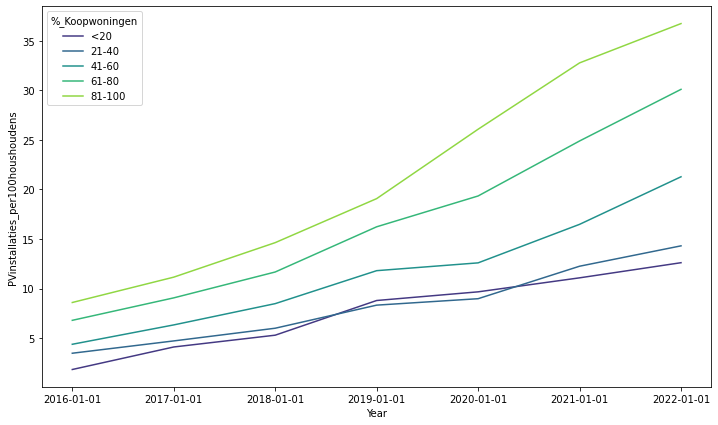

In [29]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV3, x = 'Year', y = 'PVinstallaties_per100houshoudens', hue = '%_Koopwoningen', 
             palette = "viridis")

<a id='een'></a>
#### 3. Percentage of one family houses

In [30]:
bins = [0, 20, 40, 60, 80, np.inf]
names = ['<20', '21-40', '41-60', '61-80', '81-100']

df['Perc_Eengezinswoning'] = pd.cut(df['PercentageEengezinswoning_36'], bins, labels=names)
df.head()

,Year,BU_2021,BU_NAAM,WK_2021,WK_NAAM,GM_2021,GM_NAAM,ProvinciecodePV,Provincienaam,Aantal aansluitingen met opwekinstallatie,...,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens,%_Koopwoningen,Perc_Eengezinswoning
0,2019-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,396.0,...,2.098425,0.811594,0.174497,1.3,0.8,5.0,95.704698,26.577181,61-80,81-100
1,2018-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,308.0,...,2.098425,0.811594,0.174497,1.3,0.8,5.0,71.677852,20.671141,61-80,81-100
2,2017-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,191.0,...,2.098425,0.811594,0.174497,1.3,0.8,5.0,48.724832,12.818792,61-80,81-100
3,2016-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,128.0,...,2.098425,0.811594,0.174497,1.3,0.8,5.0,33.825503,8.590604,61-80,81-100
4,2020-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,392.0,...,2.098425,0.811594,0.174497,1.3,0.8,5.0,108.120805,26.308725,61-80,81-100


In [31]:
table_PV4 = df.groupby(['Year', 'Perc_Eengezinswoning']).mean()
table_PV4 = table_PV4.reset_index()

<AxesSubplot:xlabel='Year', ylabel='PVinstallaties_per100houshoudens'>

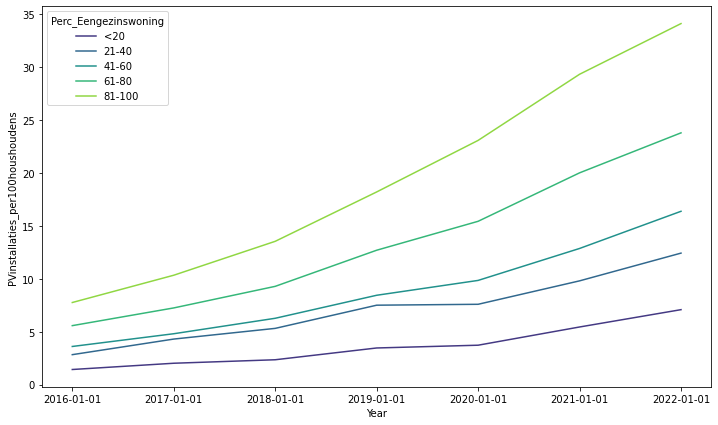

In [32]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV4, x = 'Year', y = 'PVinstallaties_per100houshoudens', hue = 'Perc_Eengezinswoning', 
             palette = "viridis")

<a id='pv2022'></a>
#### 4. Housholds with PV per 100 households in 2022

In [33]:
df2022 = df[df['Year'] == '2022-01-01']

In [34]:
df2022.head()

,Year,BU_2021,BU_NAAM,WK_2021,WK_NAAM,GM_2021,GM_NAAM,ProvinciecodePV,Provincienaam,Aantal aansluitingen met opwekinstallatie,...,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens,%_Koopwoningen,Perc_Eengezinswoning
8,2022-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,631.0,...,2.098425,0.811594,0.174497,1.3,0.8,5.0,187.516779,42.348993,61-80,81-100
17,2022-01-01,BU16800009,Verspreide huizen Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,29.0,...,2.076923,0.666667,0.461538,1.6,2.0,5.0,395.384615,44.615385,81-100,81-100
26,2022-01-01,BU16800100,Eext,WK168001,Wijk 01 Eext,GM1680,Aa en Hunze,PV22,Drenthe,201.0,...,2.114583,0.803213,0.196262,1.4,0.9,5.0,160.373832,37.570093,81-100,81-100
35,2022-01-01,BU16800109,Verspreide huizen Eext,WK168001,Wijk 01 Eext,GM1680,Aa en Hunze,PV22,Drenthe,34.0,...,2.200000,1.142857,0.277778,1.3,2.1,5.0,258.888889,37.777778,81-100,81-100
44,2022-01-01,BU16800200,Anloo,WK168002,Wijk 02 Anloo,GM1680,Aa en Hunze,PV22,Drenthe,52.0,...,2.192308,0.895522,0.241379,1.4,0.4,5.0,171.724138,35.862069,81-100,81-100


In [35]:
bins = [0, 20, 40, 60, 80, 100, np.inf]
names = ['<20', '21-40', '41-60', '61-80', '81-100', '>100']

df2022['PVinstallaties_per100houshoudens_groups'] = pd.cut(df2022['PVinstallaties_per100houshoudens'], bins, labels=names)

In [36]:
df2022 = df2022[['BU_2021', 'PVinstallaties_per100houshoudens_groups']]

In [37]:
df2022.head()

,BU_2021,PVinstallaties_per100houshoudens_groups
8,BU16800000,41-60
17,BU16800009,41-60
26,BU16800100,21-40
35,BU16800109,21-40
44,BU16800200,21-40


In [38]:
df = df.merge(df2022, left_on= 'BU_2021', right_on = 'BU_2021')

In [39]:
df.head()

,Year,BU_2021,BU_NAAM,WK_2021,WK_NAAM,GM_2021,GM_NAAM,ProvinciecodePV,Provincienaam,Aantal aansluitingen met opwekinstallatie,...,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens,%_Koopwoningen,Perc_Eengezinswoning,PVinstallaties_per100houshoudens_groups
0,2019-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,396.0,...,0.811594,0.174497,1.3,0.8,5.0,95.704698,26.577181,61-80,81-100,41-60
1,2018-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,308.0,...,0.811594,0.174497,1.3,0.8,5.0,71.677852,20.671141,61-80,81-100,41-60
2,2017-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,191.0,...,0.811594,0.174497,1.3,0.8,5.0,48.724832,12.818792,61-80,81-100,41-60
3,2016-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,128.0,...,0.811594,0.174497,1.3,0.8,5.0,33.825503,8.590604,61-80,81-100,41-60
4,2020-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,392.0,...,0.811594,0.174497,1.3,0.8,5.0,108.120805,26.308725,61-80,81-100,41-60


In [40]:
df['PVinstallaties_per100houshoudens'].nlargest(5)

5080     232.000000
12461    148.750000
710      147.272727
10850    140.000000
7790     136.000000
Name: PVinstallaties_per100houshoudens, dtype: float64

In [41]:
df[df['PVinstallaties_per100houshoudens'].isin(df['PVinstallaties_per100houshoudens'].nlargest(5))].transpose()

,710,5080,7790,10850,12461
Year,2021-01-01,2020-01-01,2021-01-01,2022-01-01,2020-01-01
BU_2021,BU08890109,BU17290009,BU16400401,BU16740800,BU00470109
BU_NAAM,Verspreide huizen,Verspreide huizen,Verspreide huizen Nunhem,Borchwerf-Noord,Verspreide huizen
WK_2021,WK088901,WK172900,WK164004,WK167408,WK004701
WK_NAAM,Wijk 01 Beesel,Wijk 00 Gulpen,Nunhem,Wijk 08 Industriegebieden,Wijk 01 Veendam-buitengebied
GM_2021,GM0889,GM1729,GM1640,GM1674,GM0047
GM_NAAM,Beesel,Gulpen-Wittem,Leudal,Roosendaal,Veendam
ProvinciecodePV,PV31,PV31,PV31,PV30,PV20
Provincienaam,Limburg,Limburg,Limburg,Noord-Brabant,Groningen
Aantal aansluitingen met opwekinstallatie,81.0,116.0,34.0,42.0,119.0


In [42]:
df['PVinstallaties_per100houshoudens_groups'].value_counts()

21-40     8686
<20       3108
41-60     2492
61-80      168
81-100      27
>100         7
Name: PVinstallaties_per100houshoudens_groups, dtype: int64

In [43]:
table_PV5 = df.groupby(['Year', 'PVinstallaties_per100houshoudens_groups']).mean()
table_PV5 = table_PV5.reset_index()

In [44]:
table_PV5

,Year,PVinstallaties_per100houshoudens_groups,Aantal aansluitingen met opwekinstallatie,Opgesteld vermogen,OV_per_installatie,MeestVoorkomendePostcode_113,HuishoudensTotaal_28,GemiddeldeHuishoudensgrootte_32,Bevolkingsdichtheid_33,Woningvoorraad_34,...,GemiddeldElektriciteitsverbruikTotaal_47,GemiddeldAardgasverbruikTotaal_55,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens
0,2016-01-01,<20,33.926991,102.254425,3.122578,6630.513274,1267.057522,1.985177,4641.287611,1216.263274,...,2703.606195,1242.276786,1.942979,0.807478,0.176224,0.936000,0.700000,2.371681,10.101995,2.980519
1,2016-01-01,21-40,45.517544,159.782297,3.775081,6679.234450,675.350877,2.389553,1877.133174,686.317384,...,3517.567783,1682.650120,1.990836,0.819826,0.292058,1.356266,1.154110,4.116427,29.062981,6.931890
2,2016-01-01,41-60,43.251381,148.248619,3.761033,7326.345304,387.444751,2.469613,1306.704420,394.359116,...,3668.282548,1806.601671,2.028425,0.827992,0.396655,1.443653,1.321330,4.436464,46.321552,11.009871
3,2016-01-01,61-80,19.375000,75.916667,3.689931,7954.541667,134.791667,2.558333,589.416667,137.291667,...,4093.750000,1958.260870,2.165902,0.947566,1.504025,1.557143,1.887500,4.625000,65.624757,14.489143
4,2016-01-01,81-100,3.500000,12.000000,2.863095,7692.500000,152.500000,2.425000,2425.250000,148.750000,...,3485.000000,1890.000000,1.773775,0.837766,3.318331,0.750000,0.950000,3.750000,20.720131,4.857610
5,2016-01-01,>100,3.000000,8.000000,2.666667,4704.000000,30.000000,2.000000,19.000000,41.000000,...,3070.000000,2280.000000,1.800000,1.428571,12.000000,NaN,1.500000,5.000000,26.666667,10.000000
6,2017-01-01,<20,45.747788,140.369469,3.241629,6630.513274,1267.057522,1.985177,4641.287611,1216.263274,...,2703.606195,1242.276786,1.942979,0.807478,0.176224,0.936000,0.700000,2.371681,13.380181,3.956899
7,2017-01-01,21-40,60.188198,211.961722,3.977005,6679.234450,675.350877,2.389553,1877.133174,686.317384,...,3517.567783,1682.650120,1.990836,0.819826,0.292058,1.356266,1.154110,4.116427,38.714868,9.158845
8,2017-01-01,41-60,59.886740,205.994475,4.136962,7326.345304,387.444751,2.469613,1306.704420,394.359116,...,3668.282548,1806.601671,2.028425,0.827992,0.396655,1.443653,1.321330,4.436464,64.250381,14.930712
9,2017-01-01,61-80,24.083333,94.916667,3.717471,7954.541667,134.791667,2.558333,589.416667,137.291667,...,4093.750000,1958.260870,2.165902,0.947566,1.504025,1.557143,1.887500,4.625000,76.704291,17.150661


(0.0, 100.0)

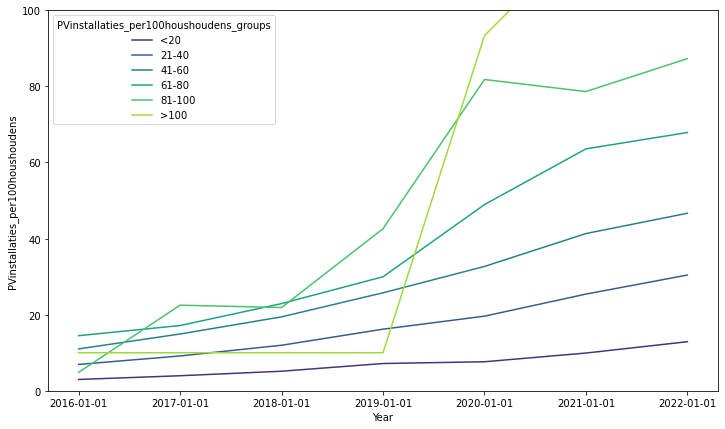

In [45]:
plt.figure(figsize = (12, 7))
ax = sns.lineplot(data = table_PV5, x = 'Year', y = 'PVinstallaties_per100houshoudens', 
             hue = 'PVinstallaties_per100houshoudens_groups', palette = "viridis")
ax.set_ylim([0, 100])

The curves for 81-100 and >100 show very irregular behavior. It should be noted that they are based just on 27 and 7 data points respectively in total, so actually from statistical perspective they are not representative, and should be removed.

In [46]:
table_PV5 = table_PV5[table_PV5['PVinstallaties_per100houshoudens_groups'].isin(['<20', '21-40', '41-60', '61-80'])]

(0.0, 100.0)

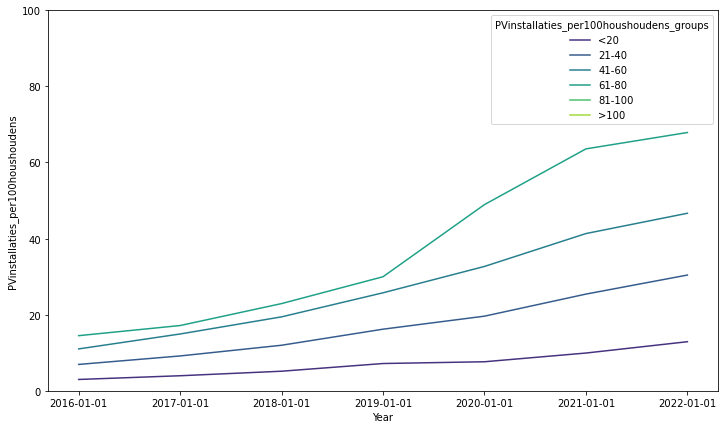

In [47]:
plt.figure(figsize = (12, 7))
ax = sns.lineplot(data = table_PV5, x = 'Year', y = 'PVinstallaties_per100houshoudens', 
             hue = 'PVinstallaties_per100houshoudens_groups', palette = "viridis")
ax.set_ylim([0, 100])

<a id='prov'></a>
#### 5. Province

In [48]:
table_PV6 = df.groupby(['Year', 'Provincienaam']).mean()
table_PV6 = table_PV6.reset_index()

<AxesSubplot:xlabel='Year', ylabel='PVinstallaties_per100houshoudens'>

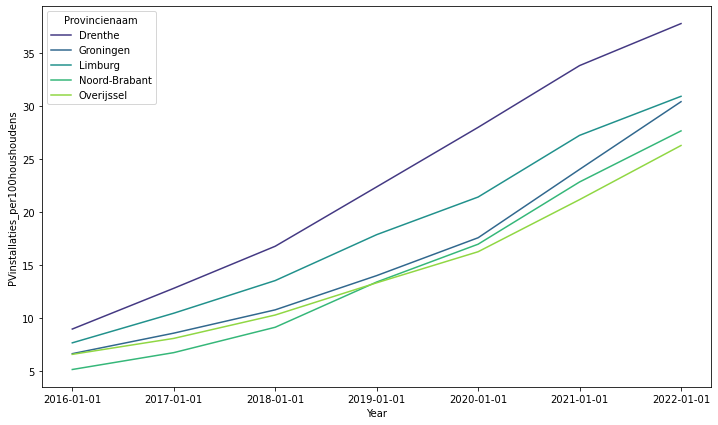

In [49]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV6, x = 'Year', y = 'PVinstallaties_per100houshoudens', 
             hue = 'Provincienaam', palette = "viridis")

<AxesSubplot:xlabel='Year', ylabel='Opgesteld_vermogen_per100houshoudens'>

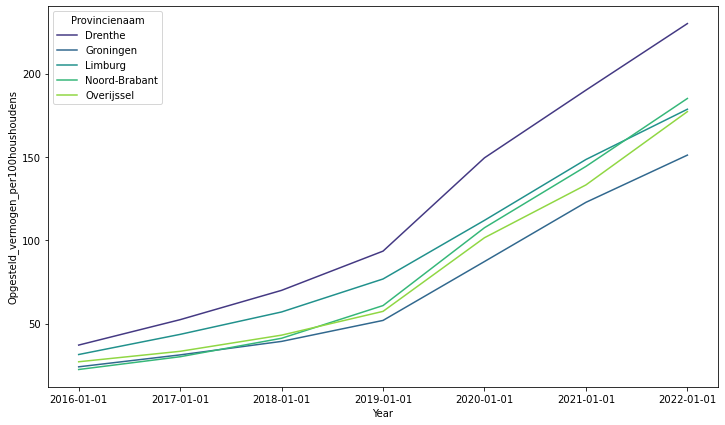

In [50]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV6, x = 'Year', y = 'Opgesteld_vermogen_per100houshoudens', 
             hue = 'Provincienaam', palette = "viridis")

<a id='elec'></a>
#### 6. Average electricity consumption

<AxesSubplot:>

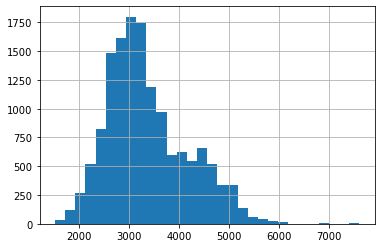

In [51]:
df['GemiddeldElektriciteitsverbruikTotaal_47'].hist(bins = 30)

In [52]:
bins = [0, 2500, 3000, 3500, 4000, 4500, np.inf]
names = ['<2500', '2500-3000', '3000-3500', '3500-4000', '4000-4500', '>4500']

df['Elektriciteitsverbruik_bins'] = pd.cut(df['GemiddeldElektriciteitsverbruikTotaal_47'], bins, labels=names)
df.head().transpose()

,0,1,2,3,4
Year,2019-01-01,2018-01-01,2017-01-01,2016-01-01,2020-01-01
BU_2021,BU16800000,BU16800000,BU16800000,BU16800000,BU16800000
BU_NAAM,Annen,Annen,Annen,Annen,Annen
WK_2021,WK168000,WK168000,WK168000,WK168000,WK168000
WK_NAAM,Wijk 00 Annen,Wijk 00 Annen,Wijk 00 Annen,Wijk 00 Annen,Wijk 00 Annen
GM_2021,GM1680,GM1680,GM1680,GM1680,GM1680
GM_NAAM,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze
ProvinciecodePV,PV22,PV22,PV22,PV22,PV22
Provincienaam,Drenthe,Drenthe,Drenthe,Drenthe,Drenthe
Aantal aansluitingen met opwekinstallatie,396.0,308.0,191.0,128.0,392.0


In [53]:
df['Elektriciteitsverbruik_bins'].value_counts()

3000-3500    3994
2500-3000    3718
3500-4000    1990
>4500        1666
<2500        1621
4000-4500    1493
Name: Elektriciteitsverbruik_bins, dtype: int64

In [54]:
table_PV7 = df.groupby(['Year', 'Elektriciteitsverbruik_bins']).mean()
table_PV7 = table_PV7.reset_index()

<AxesSubplot:xlabel='Year', ylabel='Opgesteld vermogen'>

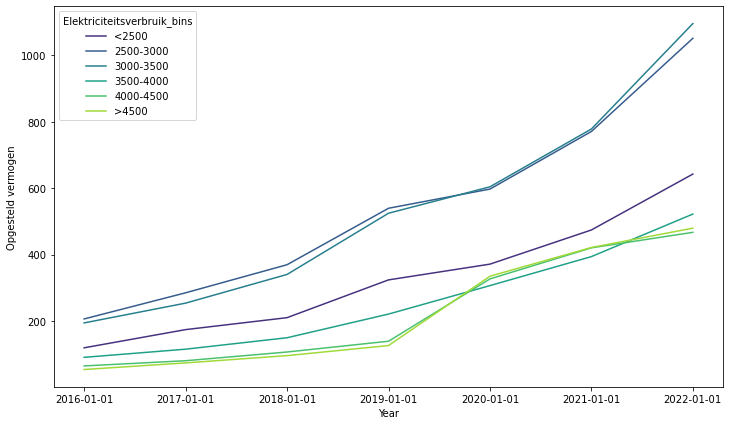

In [55]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV7, x = 'Year', y = 'Opgesteld vermogen', hue = 'Elektriciteitsverbruik_bins', 
             palette = "viridis")

<AxesSubplot:xlabel='Year', ylabel='PVinstallaties_per100houshoudens'>

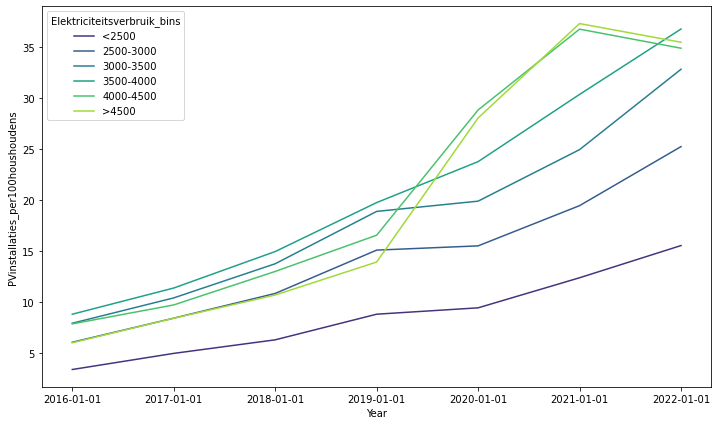

In [56]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV7, x = 'Year', y = 'PVinstallaties_per100houshoudens', hue = 'Elektriciteitsverbruik_bins', 
             palette = "viridis")

Behavior of the two highest curves is peculiar, but can perhaps be explained by the fact that the installation of a PV installation impacts the electricity consumption - after installation of PV the consumption of electricity delivered by the energy supplier drops. To avoid distortion resulting from this mutual influence, it is better to not use electricity consumption as predictor in a model describing PV.